In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\Asus\\Desktop\\datasets\\winequality-red.csv")
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

# EDA

In [3]:
df.shape

(1599, 12)

In this dataset 


*   1599 rows
*   12 columns



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Execpt Quality remaining columns is having contineous data

In [5]:
# Just confirming Whether is there any null value in the dataset or not
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.nunique().sort_values()

quality                   6
free sulfur dioxide      60
alcohol                  65
citric acid              80
pH                       89
residual sugar           91
fixed acidity            96
sulphates                96
volatile acidity        143
total sulfur dioxide    144
chlorides               153
density                 436
dtype: int64

<AxesSubplot:>

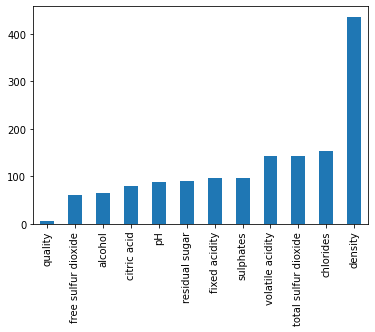

In [7]:
df.nunique().sort_values().plot.bar()

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Here citric acid minimum is zero

In [10]:
df[df["citric acid"]==0]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700          0.0             1.9      0.076   
1               7.8             0.880          0.0             2.6      0.098   
4               7.4             0.700          0.0             1.9      0.076   
5               7.4             0.660          0.0             1.8      0.075   
7               7.3             0.650          0.0             1.2      0.065   
...             ...               ...          ...             ...        ...   
1455            6.5             0.900          0.0             1.6      0.052   
1461            6.2             0.785          0.0             2.1      0.060   
1550            7.1             0.680          0.0             2.3      0.087   
1551            7.1             0.670          0.0             2.3      0.083   
1553            7.3             0.735          0.0             2.2      0.080   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
7                    15.0                  21.0  0.99460  3.39       0.47   
...                   ...                   ...      ...   ...        ...   
1455                  9.0                  17.0  0.99467  3.50       0.63   
1461                  6.0                  13.0  0.99664  3.59       0.61   
1550                 17.0                  26.0  0.99783  3.45       0.53   
1551                 18.0                  27.0  0.99768  3.44       0.54   
1553                 18.0                  28.0  0.99765  3.41       0.60   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
4         9.4        5  
5         9.4        5  
7        10.0        7  
...       ...      ...  
1455     10.9        6  
1461     10.0        4  
1550      9.5        5  
1551      9.4        5  
1553      9.4        5  

[132 rows x 12 columns]

Here as we can see there are 132 rows in citric acid is having Zero Values. So it means we can't use log transformation for removing outliers of transforming data into normal distribution.

# Univariate Analysis

<AxesSubplot:>

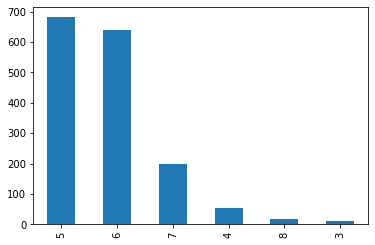

In [14]:
df["quality"].value_counts().plot.bar()

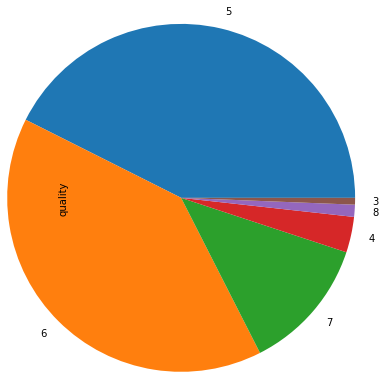

In [15]:
df["quality"].value_counts().plot.pie(radius=2)
plt.show()

Here two class lies :
* Bad (0) = label[3,4,5,6]
* Good (1) = label [7,8]

**Dataset is not Balanced we need to use Stratify,Upsampled or may be Downsampled before modeiling**

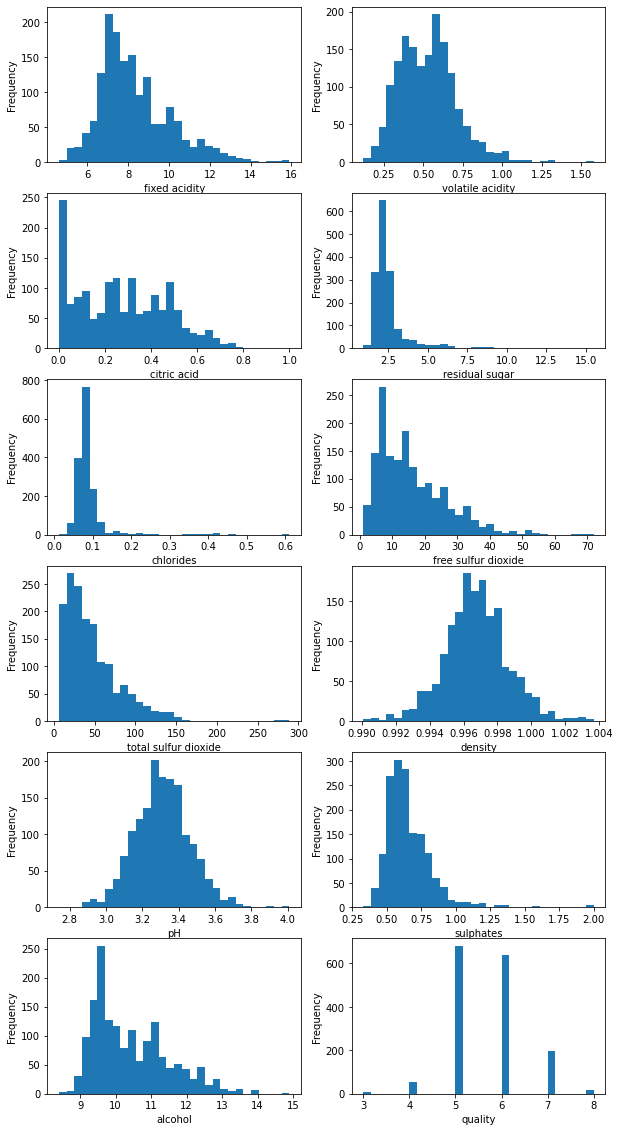

In [16]:
plt.figure(figsize=(10,20))
plotnumber = 1
for i in df:
    ax=plt.subplot(6,2,plotnumber)
    df[i].plot.hist(bins=30)
    plt.xlabel(i)
    plotnumber+=1

There is some kind of skewness in the data in this columnsfixed acidity, volatile acidity ,citric acidity, residual sugar, chlorides, free sulfur dioxide, total_sulphur_dioxide, density sulphates alcohol and chloride had the maximum skewness

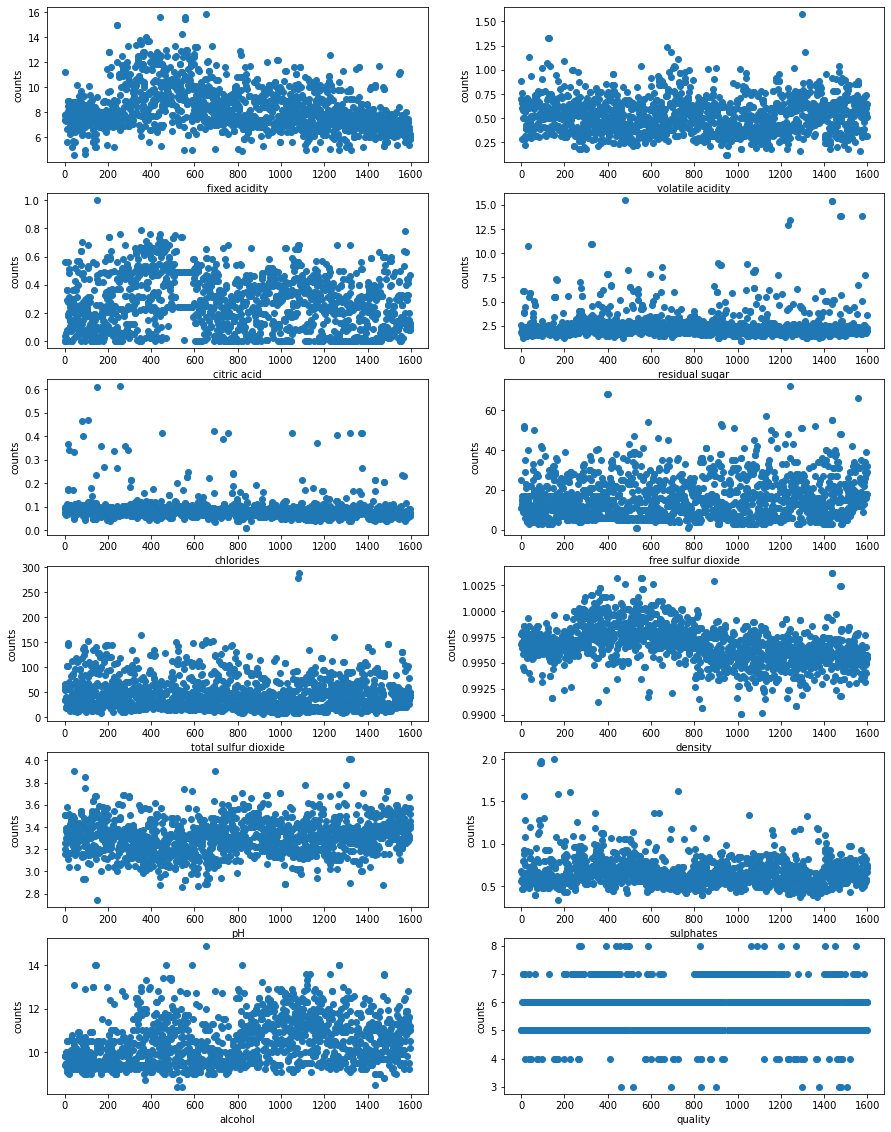

In [17]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df:
    ax=plt.subplot(6,2,plotnumber)
    plt.scatter(df.index,df[i])
    plt.xlabel(i)
    plt.ylabel("counts")
    plotnumber+=1

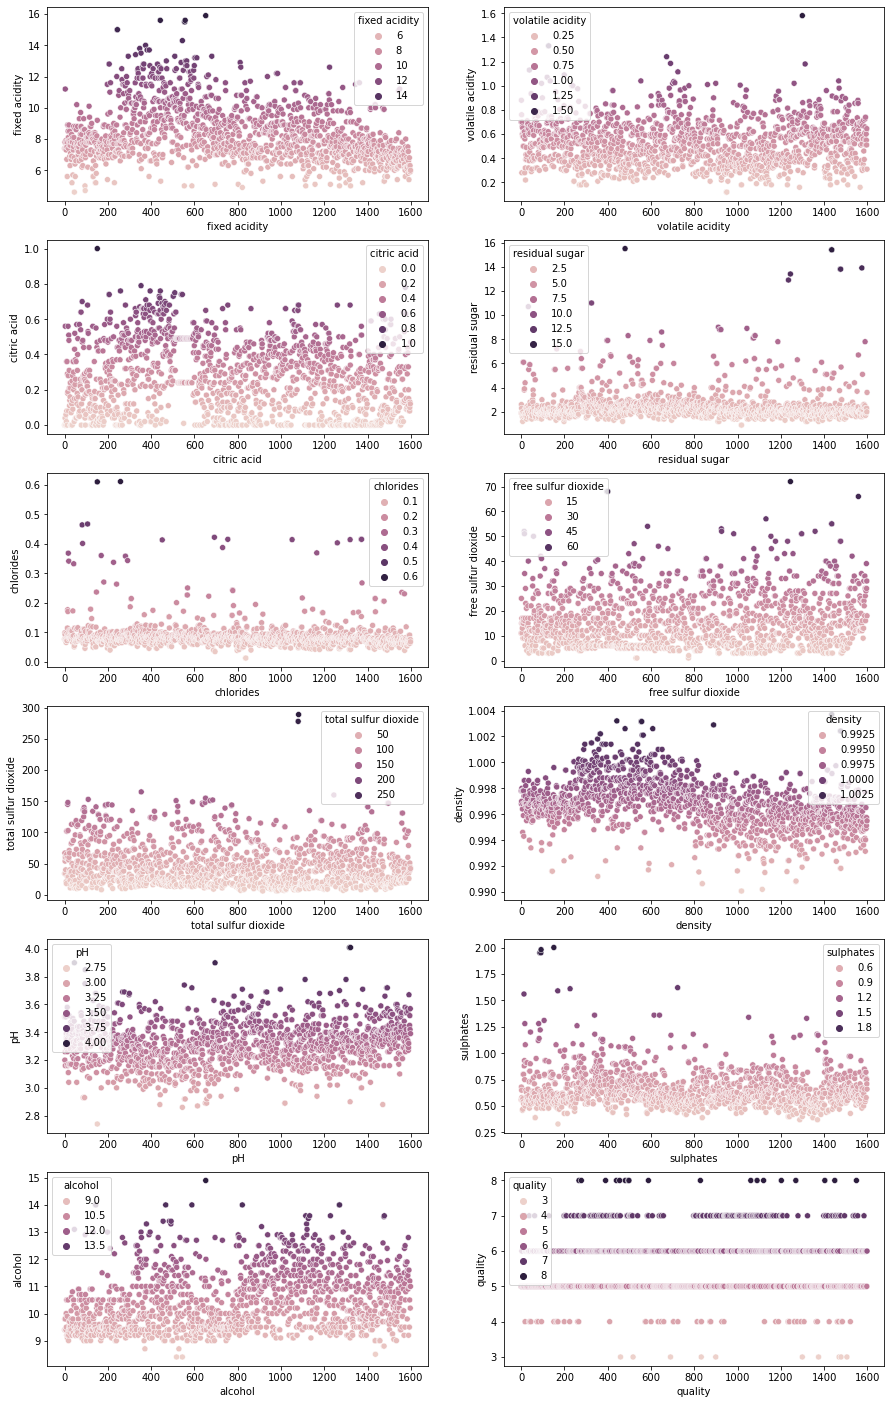

In [18]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
     if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.scatterplot(df.index,df[i],hue=df[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

From Above plot we can see there is some Outliers in dataset

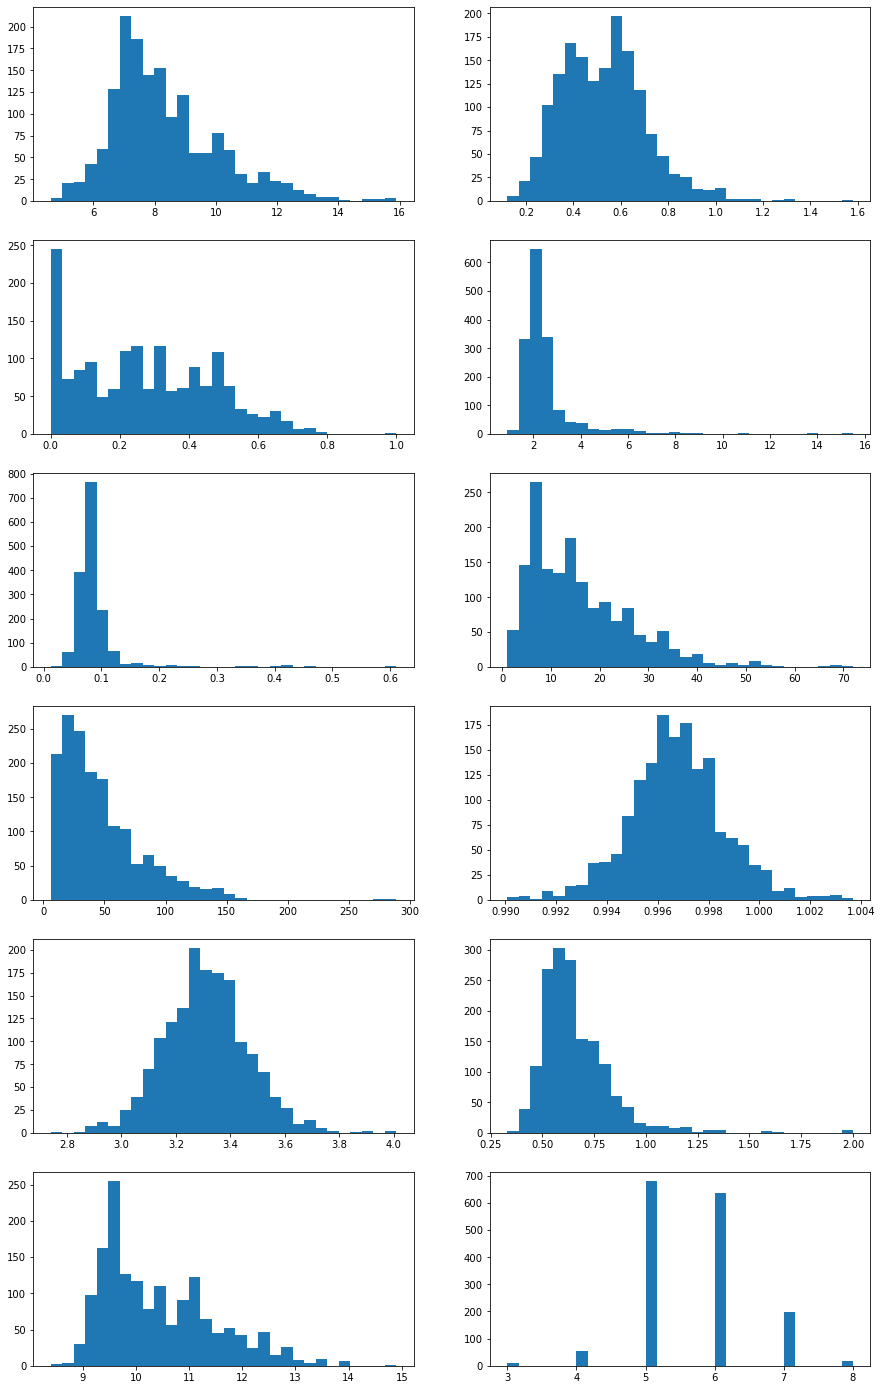

In [19]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        plt.hist(df[i],bins=30)
        plotnumber+=1
plt.show()

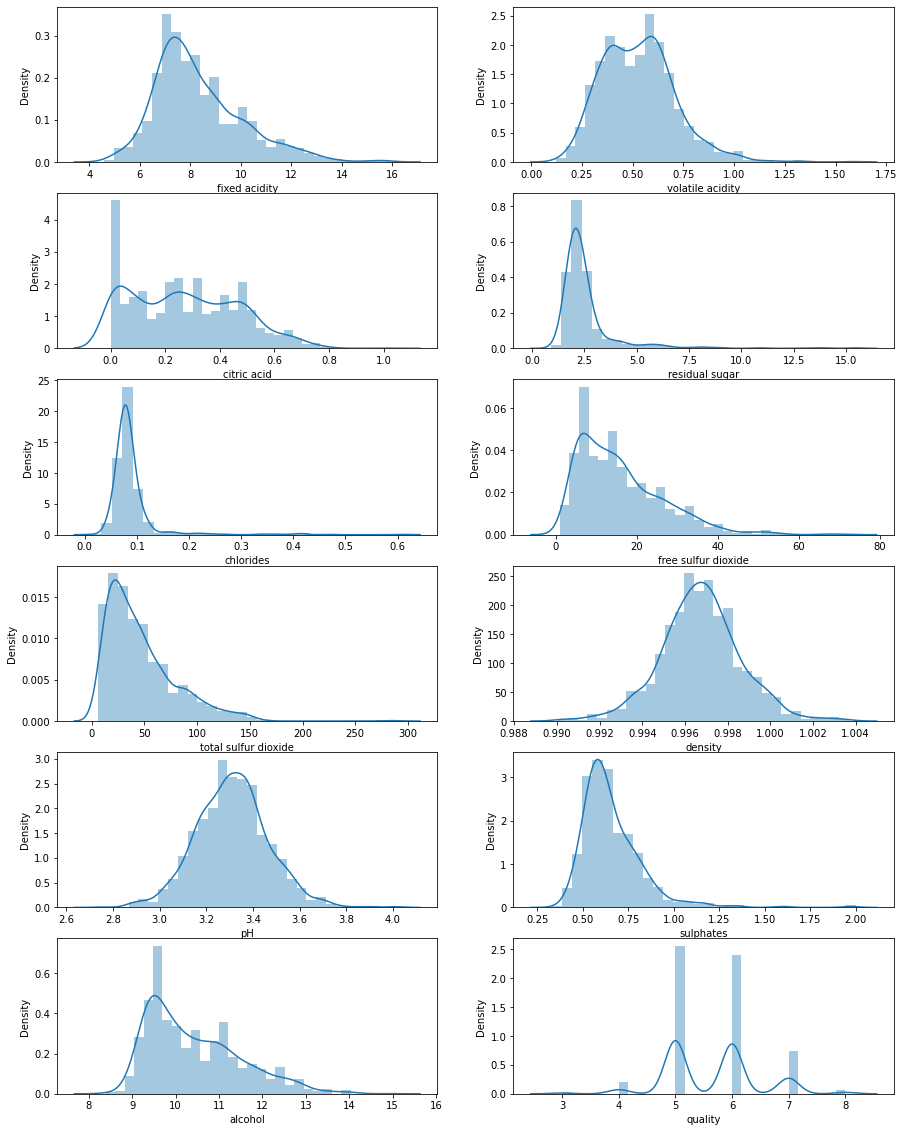

In [20]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.distplot(df[i],bins = 30)
    plotnumber+=1
plt.show()

 There is some kind of skewness in the data in this columns**fixed acidity, volatile acidity ,citric acidity, residual sugar, chlorides, free sulfur dioxide, total_sulphur_dioxide, density sulphates alcohol** and chloride had the maximum skewness

In [21]:
df.skew().to_frame()

0
fixed acidity         0.982751
volatile acidity      0.671593
citric acid           0.318337
residual sugar        4.540655
chlorides             5.680347
free sulfur dioxide   1.250567
total sulfur dioxide  1.515531
density               0.071288
pH                    0.193683
sulphates             2.428672
alcohol               0.860829
quality               0.217802

Just Confirming the skewness in the dataset. As above values shows that there is skewness in **fixed acidity, Volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulphates,alcohol.** it is may be because of Outliers

## Bivariate Analysis

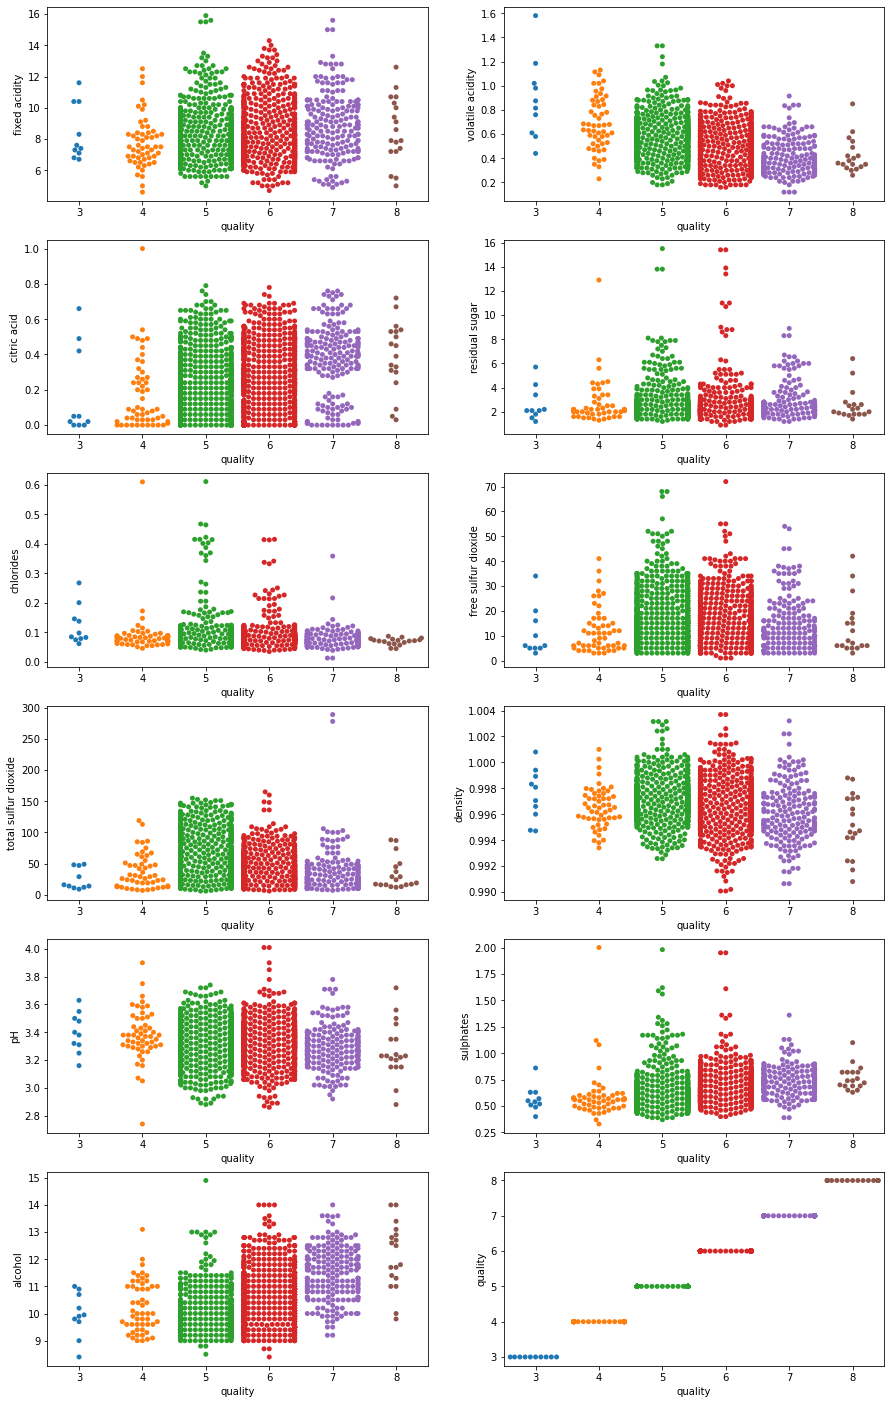

In [22]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.swarmplot(df.quality,df[i])
        plotnumber+=1
plt.show()

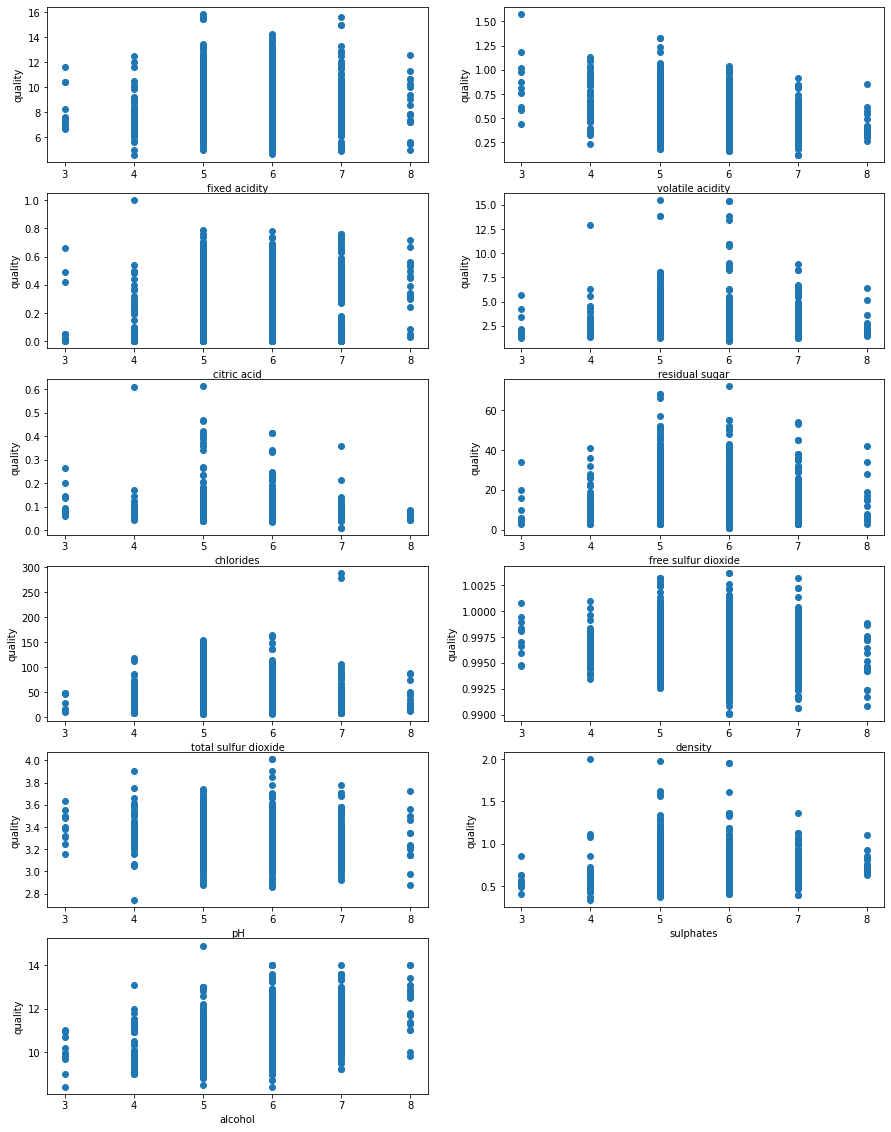

In [23]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df.drop("quality",axis=1):
    ax=plt.subplot(6,2,plotnumber)
    plt.scatter(df.quality,df[i])
    plt.xlabel(i)
    plt.ylabel("quality")
    plotnumber+=1

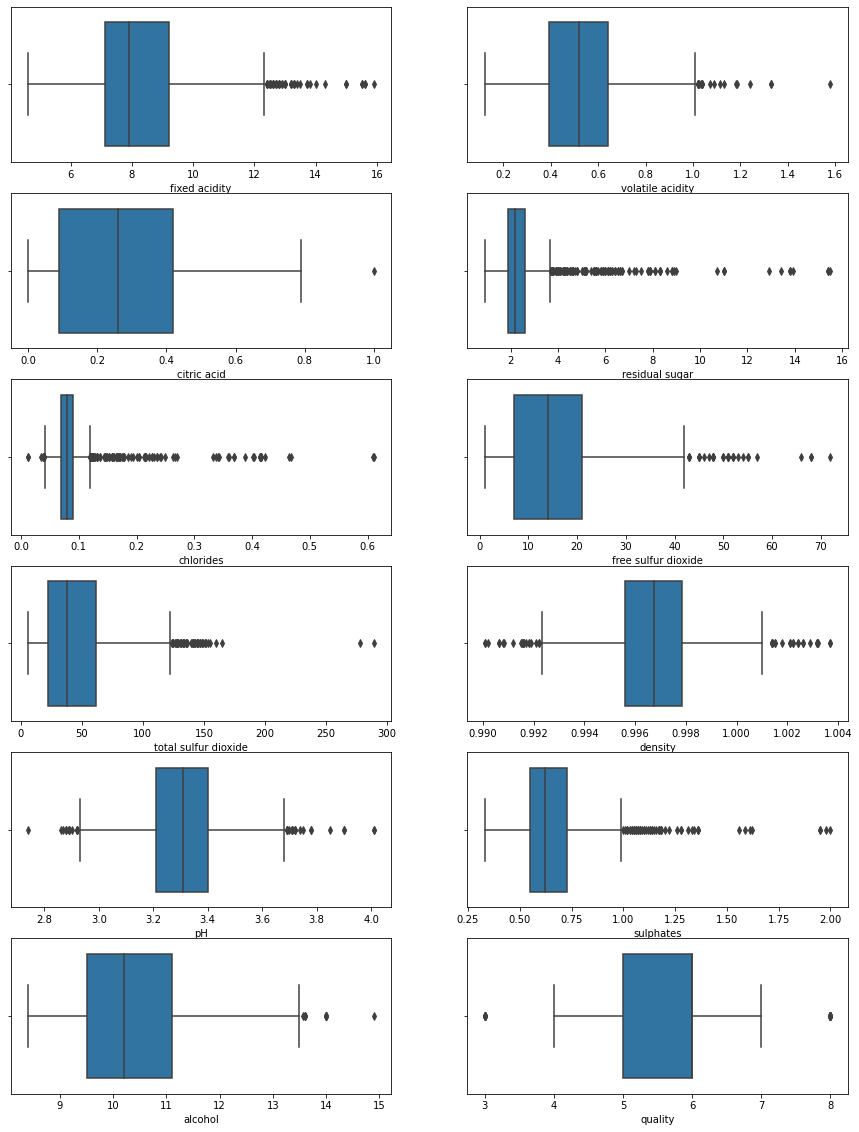

In [24]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.boxplot(df[i],orient="v")
        plotnumber+=1
plt.show()

Outliers in all the column **fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol**

## Multivariate Analysis

In [25]:
df.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

[volatile acidity, total sulfur dioxide, density, chlorides, pH, free sulfur dioxide] has negative Correlation with the Label

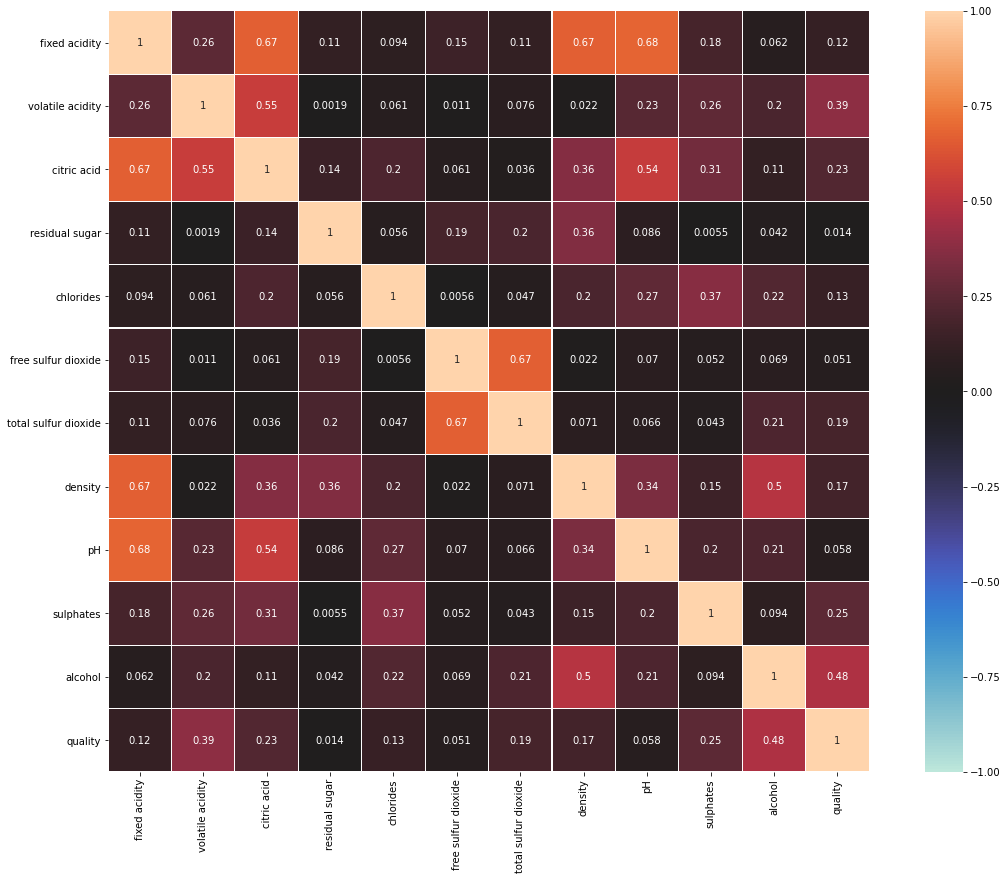

In [26]:
df_corr= df.corr().abs()
plt.figure(figsize=(20,14))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)
plt.show()

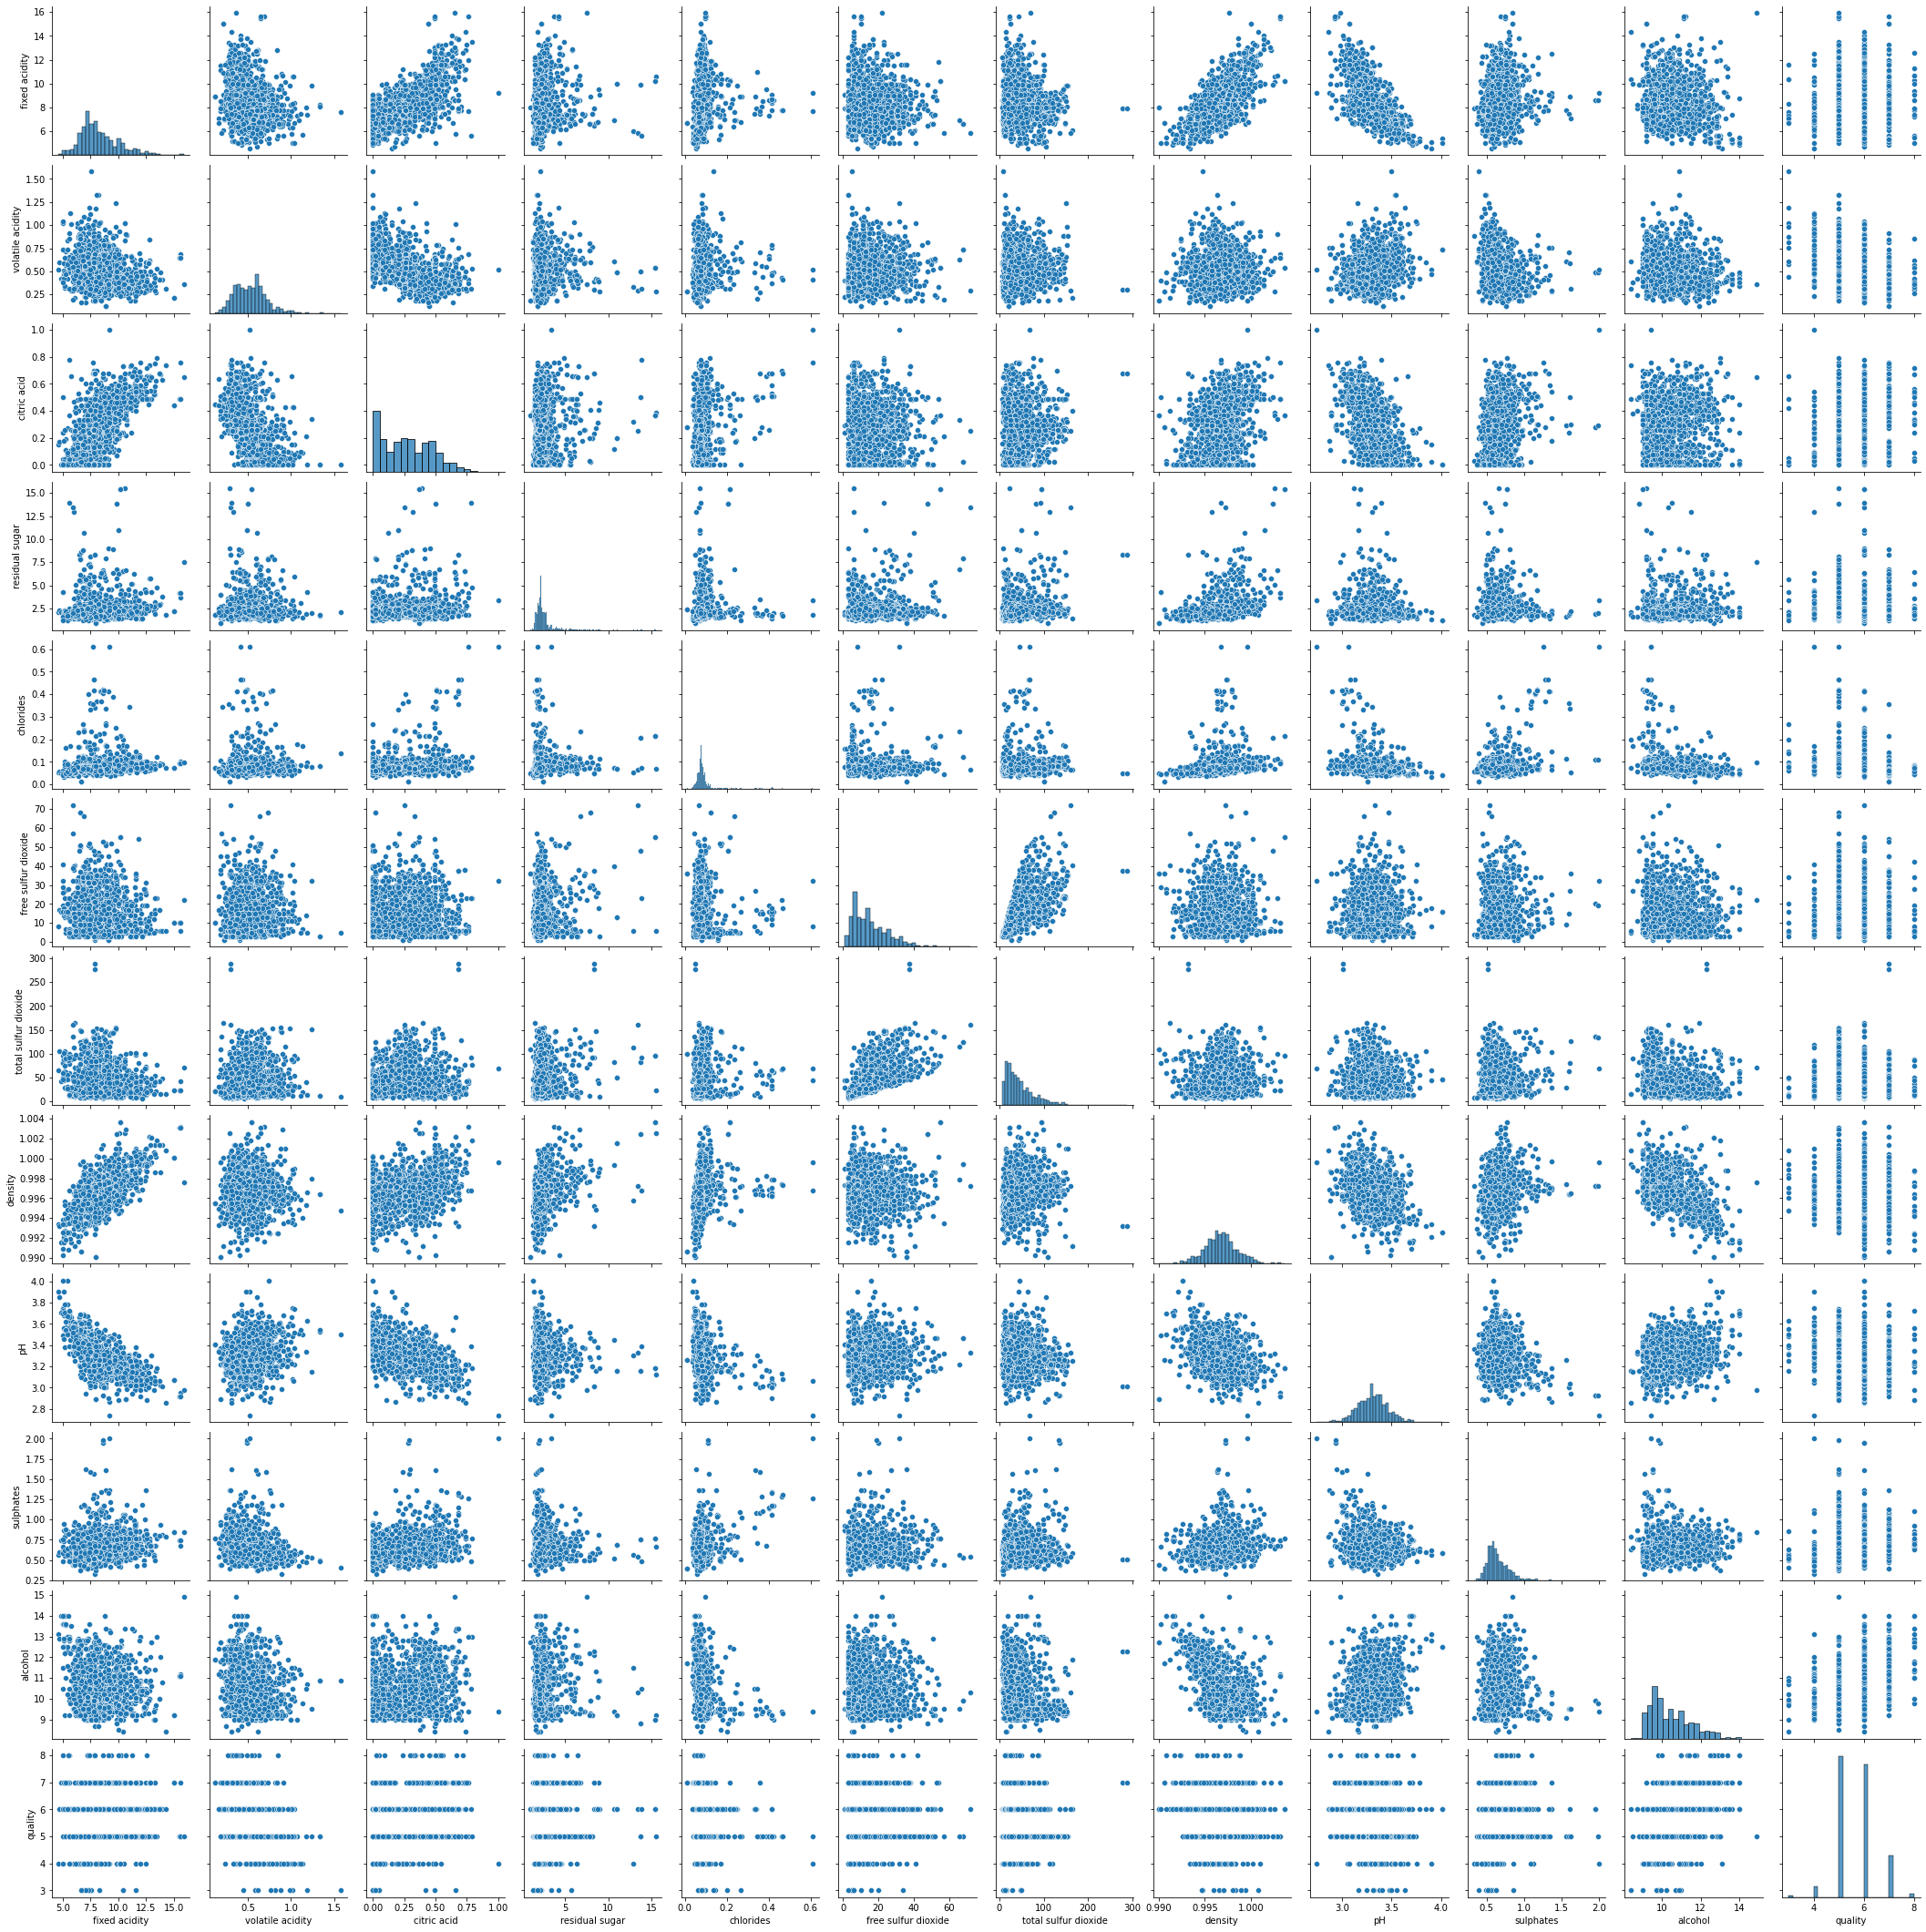

In [27]:
sns.pairplot(data=df)
plt.show()

In [28]:
df.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

**residual sugar and pH has the least correlation with quality**

# Data Cleaning

In [29]:
datacleaned = df[df["alcohol"] < df["alcohol"].quantile(0.91)]
datacleaned = df[df["chlorides"] < df["chlorides"].quantile(0.91)]
datacleaned = df[df["free sulfur dioxide"] < df["free sulfur dioxide"].quantile(0.91)]
datacleaned = df[df["total sulfur dioxide"] < df["total sulfur dioxide"].quantile(0.91)]
datacleaned = df[df["residual sugar"] < df["residual sugar"].quantile(0.91)]


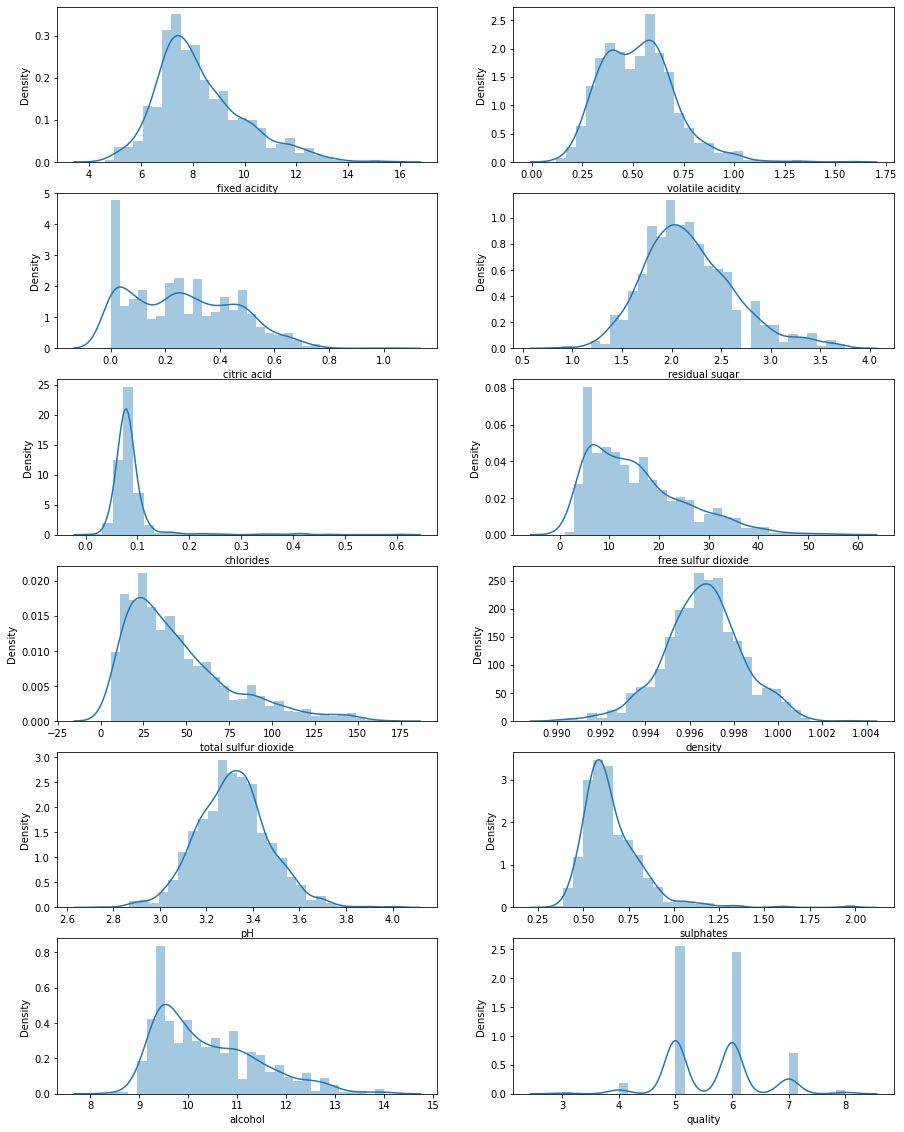

In [30]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in datacleaned:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.distplot(datacleaned[i],bins = 30)
    plotnumber+=1
plt.show()

In [31]:
datacleaned.shape

(1449, 12)

**Here we loose 150 rows and still the data is not normal and we continue doing this we may loose the data more than 10% to make data look normal **

In [32]:
features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
df[features].head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [33]:
# Applying z Score method to remove Outliers
from scipy.stats import zscore

In [34]:
zscr=zscore(df[features])
abs_score=np.abs(zscr)

In [35]:
filter=(abs_score<3).all (axis=1)
filter.shape

(1599,)

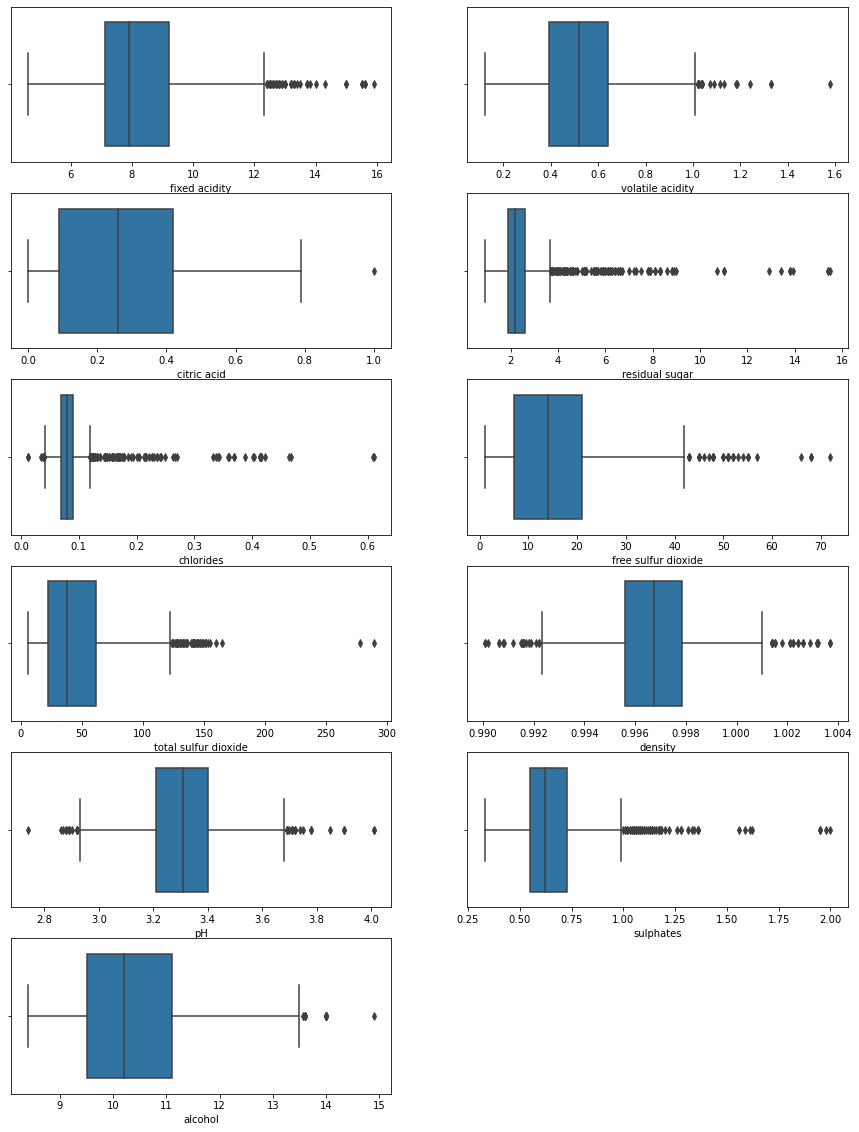

In [36]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df[features]:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.boxplot(df[i],orient="v")
        plotnumber+=1
plt.show()

In [37]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [38]:
# Making a copy of dataframe to check which method is good for taking care of skewness and Outliers
df1 = pd.DataFrame(df)

In [39]:
#Trying Interquartile method
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3-q1

In [40]:
for column in df1[features]:
    max=(q3[column]+(1.5*iqr[column]))
    index=np.where(df1[column]>max)
    df1.drop(df1.index[index],inplace=True,axis=0)
df1.shape

(1212, 12)

In [41]:
for column in df1[features]:
    min=(q1[column]-(1.5*iqr[column]))
    index=np.where(df1[column] <min)
    df1.drop(df1.index[index],inplace=True,axis=0)
df1.shape

(1194, 12)

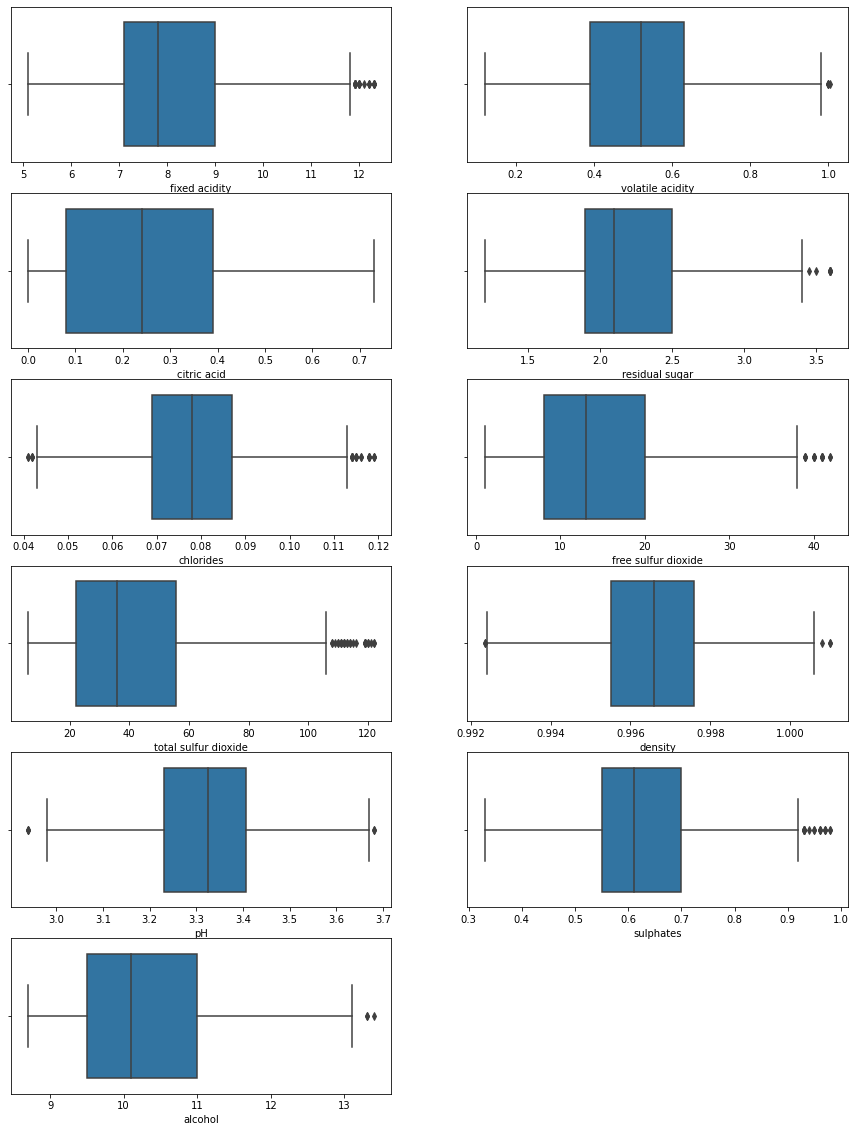

In [42]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df1[features]:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.boxplot(df1[i],orient="v")
        plotnumber+=1
plt.show()

At some extent Outliers has been taken care . But Here We have lost more than 10% of the data so we use the actual DataFrame and use PowerTransform technique to remove the skewness and Make data normally distributed and i did not take care of the Outliers

In [43]:
from sklearn.preprocessing import PowerTransformer
norm = PowerTransformer()

In [44]:
df[features] = norm.fit_transform(df[features].values)

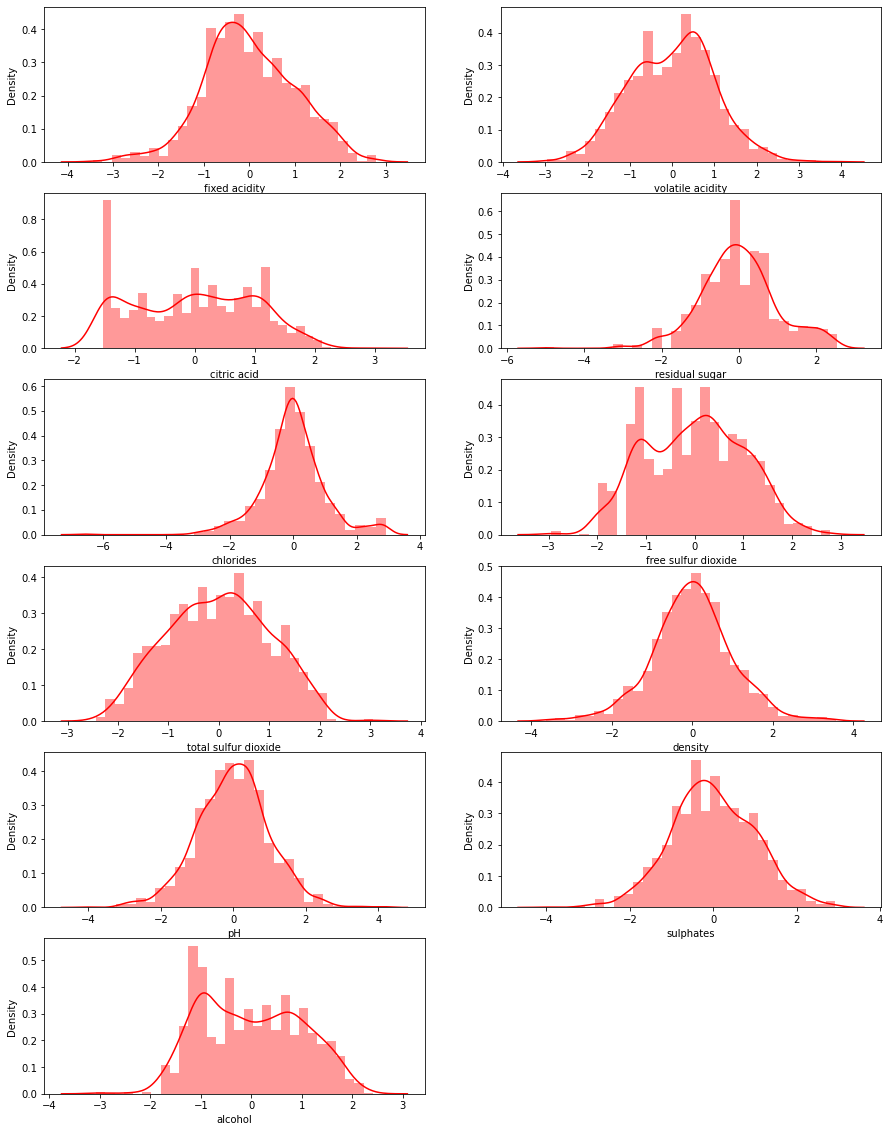

In [45]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df[features]:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.distplot(df[i],bins = 30,color="r")
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

__Now data is looking more like Guassian Distribution.__

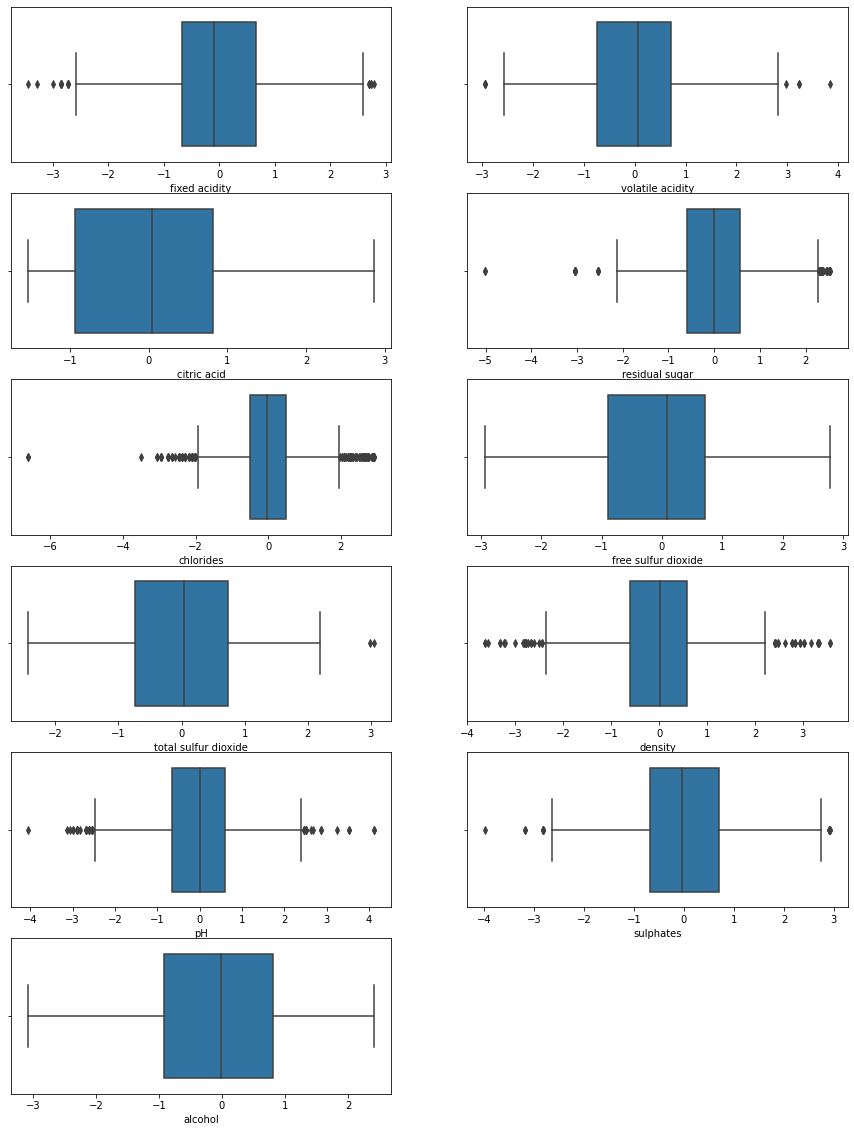

In [46]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df[features]:
    if plotnumber < 13:
        ax =  plt.subplot(6,2,plotnumber)
        sns.boxplot(df[i],orient="v")
        plotnumber+=1
plt.show()

In [47]:
df.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
quality                 0.217802
dtype: float64

**Skewness is in range (+0.5 to -0.5)** . Still Outliers is present in the dataset because if i try to remove the outlier the data loss is greater than 10% so i am keeping the outliers. But the skewness in the data is been taken care

In [48]:
df.shape

(1599, 12)

In [49]:
#Converting label in 0 and 1
df["quality"] = df.quality.replace([3,4,5,6],0)
df["quality"] = df.quality.replace([7,8],1)

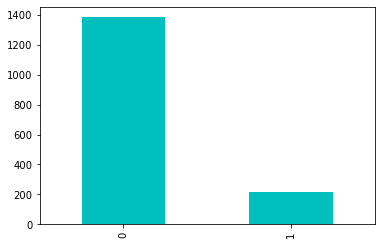

In [50]:
df["quality"].value_counts().plot.bar(color='c')
plt.show()

### Upsampling the Unbalanced dataset

In [51]:
from sklearn.utils import resample
bad = df[df["quality"]==0]
good = df[df["quality"]==1]

In [52]:
up_sampled = resample(good,replace=True,n_samples=len(bad),random_state=0)

In [53]:
new_data=pd.concat([bad,up_sampled])
new_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        -0.442666          0.995542    -1.531109       -0.597145  -0.172896   
1        -0.161308          1.771299    -1.531109        0.556565   0.786204   
2        -0.161308          1.269801    -1.255359        0.152372   0.560696   
3         1.522582         -1.550050     1.398471       -0.597145  -0.226113   
4        -0.442666          0.995542    -1.531109       -0.597145  -0.172896   
..             ...               ...          ...             ...        ...   
514       1.252534          0.000387     1.702221        0.299203   1.082730   
278       1.169629         -1.245995     0.945362        2.159053  -0.335468   
37        0.034460         -0.819455     0.147336       -0.185690  -0.750928   
901      -0.442666          0.678295    -0.867068        0.299203   0.030646   
858       1.698340         -1.550050     1.031070       -1.104785  -1.598782   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0              -0.268045             -0.124411  0.564442  1.275690  -0.581650   
1               0.993852              0.854954  0.036967 -0.709517   0.395140   
2               0.193450              0.540394  0.142851 -0.310054   0.183772   
3               0.385115              0.693699  0.669354 -0.980154  -0.392318   
4              -0.268045             -0.124411  0.564442  1.275690  -0.581650   
..                   ...                   ...       ...       ...        ...   
514            -1.107886             -1.258911  0.301312 -1.462372   0.256369   
278            -1.342264             -1.450339  0.459336 -0.508825   1.168878   
37             -0.021924             -0.301698  0.036967 -0.508825   0.707973   
901             0.291904             -0.166804  0.332952  1.698451   0.461464   
858             0.385115             -0.210431  0.068752 -1.048366   0.326800   

      alcohol  quality  
0   -1.075025        0  
1   -0.500860        0  
2   -0.500860        0  
3   -0.500860        0  
4   -1.075025        0  
..        ...      ...  
514  1.284199        1  
278  1.693229        1  
37  -0.634993        1  
901  0.568428        1  
858  0.388468        1  

[2764 rows x 12 columns]

In [54]:
new_data.shape

(2764, 12)

After upsampling no. of columns increases

In [55]:
x=new_data.drop("quality",axis=1)
y=new_data.quality

In [210]:
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import BaggingClassifier

In [57]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [58]:
max_accu = 0
max_RS = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score > max_accu:
        max_Rs = i
        max_accu = accu_score
print("Random state :",max_RS,"Best accuracy :",max_accu)


Random state : 0 Best accuracy : 0.9734939759036144


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=0)

### Logistic regression

In [182]:
## Model Building
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [183]:
y_pred = log_reg.predict(x_test)

In [184]:
diff=[]
cross = []
Accu =[]
cv=cross_val_score(log_reg,x_scaled,y,cv=10).mean()
accu=accuracy_score(y_test,y_pred)
print("="*60,"\nAccuracy score :",accuracy_score(y_test,y_pred),"\n","="*60,"\nClassification Report \n",
      classification_report(y_test,y_pred),"\n","="*60,"\nCross Validation Score :",cross_val_score(log_reg,x_scaled,y,cv=10).mean(),
      "\n","="*60,"\nConfusion Matrix:\n ",confusion_matrix(y_test,y_pred))

Accuracy score : 0.8060240963855422 
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       427
           1       0.77      0.85      0.81       403

    accuracy                           0.81       830
   macro avg       0.81      0.81      0.81       830
weighted avg       0.81      0.81      0.81       830
 
Cross Validation Score : 0.7969876523831948 
Confusion Matrix:
  [[326 101]
 [ 60 343]]


In [185]:
diff.append(accu-cv)
cross.append(cv)
Accu.append(accu)

In [186]:
Models = ["LogisticRegression","Knn","GBDT","DecisionTree","SVM","BaggingClassifier"]

## Knn

In [187]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [188]:
y_pred = knn.predict(x_test)

In [189]:
cv=cross_val_score(knn,x_scaled,y,cv=10).mean()
accu=accuracy_score(y_test,y_pred)
print("="*60,"\nAccuracy score :",accuracy_score(y_test,y_pred),"\n","="*60,"\nClassification Report \n",
      classification_report(y_test,y_pred),"\n","="*60,"\nCross Validation Score :",cross_val_score(knn,x_scaled,y,cv=10).mean(),
      "\n","="*60,"\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score : 0.8819277108433735 
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.80      0.87       427
           1       0.82      0.97      0.89       403

    accuracy                           0.88       830
   macro avg       0.89      0.88      0.88       830
weighted avg       0.90      0.88      0.88       830
 
Cross Validation Score : 0.8722557944854288 
Confusion Matrix:
 [[340  87]
 [ 11 392]]


In [190]:
diff.append(accu-cv)
cross.append(cv)
Accu.append(accu)

## GradientBoosting

In [191]:
gbt = GradientBoostingClassifier()
gbt.fit(x_train,y_train)

GradientBoostingClassifier()

In [192]:
y_pred = gbt.predict(x_test)

In [193]:
cv=cross_val_score(gbt,x_scaled,y,cv=10).mean()
accu=accuracy_score(y_test,y_pred)
print("="*60,"\nAccuracy score :",accuracy_score(y_test,y_pred),"\n","="*60,"\nClassification Report \n",
      classification_report(y_test,y_pred),"\n","="*60,"\nCross Validation Score :",cross_val_score(gbt,x_scaled,y,cv=10).mean(),
     "\n","="*60,"\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score : 0.9048192771084337 
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       427
           1       0.86      0.96      0.91       403

    accuracy                           0.90       830
   macro avg       0.91      0.91      0.90       830
weighted avg       0.91      0.90      0.90       830
 
Cross Validation Score : 0.8997580181028619 
Confusion Matrix:
 [[365  62]
 [ 17 386]]


In [194]:
diff.append(accu-cv)
cross.append(cv)
Accu.append(accu)

## DecisionTree

In [195]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [196]:
y_pred = dt.predict(x_test)

In [197]:
cv=cross_val_score(dt,x_scaled,y,cv=10).mean()
accu=accuracy_score(y_test,y_pred)
print("="*60,"\nAccuracy score :",accuracy_score(y_test,y_pred),"\n","="*60,"\nClassification Report \n",
      classification_report(y_test,y_pred),"\n","="*60,"\nCross Validation Score :",cross_val_score(dt,x_scaled,y,cv=10).mean(),
     "\n","="*60,"\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score : 0.9614457831325302 
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       427
           1       0.93      1.00      0.96       403

    accuracy                           0.96       830
   macro avg       0.96      0.96      0.96       830
weighted avg       0.96      0.96      0.96       830
 
Cross Validation Score : 0.941382828441375 
Confusion Matrix:
 [[396  31]
 [  1 402]]


In [198]:
diff.append(accu-cv)
cross.append(cv)
Accu.append(accu)

## SVM

In [199]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [200]:
y_pred = svc.predict(x_test)

In [201]:
cv=cross_val_score(svc,x_scaled,y,cv=10).mean()
accu=accuracy_score(y_test,y_pred)
print("="*60,"\nAccuracy score :",accuracy_score(y_test,y_pred),"\n","="*60,"\nClassification Report \n",
      classification_report(y_test,y_pred),"\n","="*60,"\nCross Validation Score :",cross_val_score(svc,x_scaled,y,cv=10).mean(),
     "\n","="*60,"\nConfusion Matrix:\n ",confusion_matrix(y_test,y_pred))

Accuracy score : 0.8831325301204819 
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       427
           1       0.85      0.93      0.89       403

    accuracy                           0.88       830
   macro avg       0.89      0.88      0.88       830
weighted avg       0.89      0.88      0.88       830
 
Cross Validation Score : 0.8635915345576309 
Confusion Matrix:
  [[359  68]
 [ 29 374]]


In [202]:
diff.append(accu-cv)
cross.append(cv)
Accu.append(accu)

## Bagging Classifier

In [203]:
bag_clf = BaggingClassifier()

In [204]:
bag_clf.fit(x_train,y_train)

BaggingClassifier()

In [205]:
y_pred = bag_clf.predict(x_test)

In [206]:
cv=cross_val_score(bag_clf,x_scaled,y,cv=10).mean()
accu=accuracy_score(y_test,y_pred)
print("="*60,"\nAccuracy score :",accuracy_score(y_test,y_pred),"\n","="*60,"\nClassification Report \n",
      classification_report(y_test,y_pred),"\n","="*60,"\nCross Validation Score :",cross_val_score(svc,x_scaled,y,cv=10).mean(),
     "\n","="*60,"\nConfusion Matrix:\n ",confusion_matrix(y_test,y_pred))

Accuracy score : 0.9674698795180723 
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       427
           1       0.94      1.00      0.97       403

    accuracy                           0.97       830
   macro avg       0.97      0.97      0.97       830
weighted avg       0.97      0.97      0.97       830
 
Cross Validation Score : 0.8635915345576309 
Confusion Matrix:
  [[401  26]
 [  1 402]]


In [207]:
diff.append(accu-cv)
cross.append(cv)
Accu.append(accu)

In [209]:
Best = pd.DataFrame({"MOdel":Models,
                    "Accuracy":Accu,
                    "Cross Validation Score":cross,
                    "Difference":diff})
Best

MOdel  Accuracy  Cross Validation Score  Difference
0  LogisticRegression  0.806024                0.796988    0.009036
1                 Knn  0.881928                0.872256    0.009672
2                GBDT  0.904819                0.899758    0.005061
3        DecisionTree  0.961446                0.934146    0.027300
4                 SVM  0.883133                0.863592    0.019541
5   BaggingClassifier  0.967470                0.955840    0.011630

### I have tried to remove **residual sugar and pH** column and test the model. It increases the False Negative

I have tried the dataset(df1). With every models as well it improve accuracy and cross validation in svm, GradientBoosting and BaggingClassifier but the loss is more than 10 percent so i switched back to normal dataset after transformed it using Power Transform method to remove skewness and make the model.

## Hyperparameter Tunning

#### I have least difference between acuracy score and cv score in GradientBoosting . So i am going to tune it

#### 1. GBDT model tunning (Best Model)

In [214]:
params = {"criterion":["friedman_mse", "mse", "mae"],
          "n_estimators":list(range(100,900,100))
          "loss":["deviance","exponential"],
          "learning_rate":list(np.arange(0.0001,1,0.001)),
          "max_depth":list(range(3,40,2)),
          "min_samples_split":range(1,50,2),
          "min_samples_leaf":range(1,50,2),
          'random_state':range(0,20,2)
         }

Using RandomizedSearchCv to find the Best Parameter because it is computationally less expensive and taking less time than GridSearchCV

In [217]:
rand_search = RandomizedSearchCV(gbt,param_distributions=params,cv=3)

In [218]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.0001, 0.0011,
                                                          0.0021, 0.0031,
                                                          0.0041, 0.0051,
                                                          0.0061, 0.0071,
                                                          0.0081, 0.0091,
                                                          0.0101,
                                                          0.011099999999999999,
                                                          0.0121, 0.0131,
                                                          0.0141,
                                                          0.015099999999999999,
                                                          0.

In [219]:
rand_search.best_params_

{'random_state': 2,
 'min_samples_split': 13,
 'min_samples_leaf': 43,
 'max_depth': 35,
 'loss': 'exponential',
 'learning_rate': 0.5891,
 'criterion': 'friedman_mse'}

In [220]:
gbt = GradientBoostingClassifier(random_state=2,min_samples_split=13,min_samples_leaf=43,max_depth=35,loss="exponential",
                                learning_rate=0.5891,criterion="friedman_mse")
gbt.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5891, loss='exponential',
                           max_depth=35, min_samples_leaf=43,
                           min_samples_split=13, random_state=2)

In [221]:
y_pred = gbt.predict(x_test)

In [223]:
print("="*60,"\nAccuracy score :",accuracy_score(y_test,y_pred),"\n","="*60,"\nClassification Report \n",
      classification_report(y_test,y_pred),"\n","="*60,"\nCross Validation Score :",cross_val_score(gbt,x_scaled,y,cv=5).mean(),
      "\n","="*60,"\nConfusion Matrix:\n ",confusion_matrix(y_test,y_pred))

Accuracy score : 0.9674698795180723 
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       427
           1       0.94      1.00      0.97       403

    accuracy                           0.97       830
   macro avg       0.97      0.97      0.97       830
weighted avg       0.97      0.97      0.97       830
 
Cross Validation Score : 0.9460990119768325 
Confusion Matrix:
  [[401  26]
 [  1 402]]


In [224]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

In [226]:
#LogisticRegression
print("Log_reg roc_auc_score",roc_auc_score(y_test,log_reg.predict(x_test)))

#Knn
print("knn roc_auc_score",roc_auc_score(y_test,knn.predict(x_test)))

#GradientBossting
print("Gbt roc_auc_score",roc_auc_score(y_test,gbt.predict(x_test)))

#DecisionTree
print("DecisionTree roc_auc_score",roc_auc_score(y_test,dt.predict(x_test)))

#SVM
print("SVM roc_auc_score",roc_auc_score(y_test,svc.predict(x_test)))

#BaggingClassifier
print("Bag_clf roc_auc_score",roc_auc_score(y_test,bag_clf.predict(x_test)))

Log_reg roc_auc_score 0.8072913337323702
knn roc_auc_score 0.8844788210203334
Gbt roc_auc_score 0.9683143403397237
DecisionTree roc_auc_score 0.9624595394029556
SVM roc_auc_score 0.8843945583765785
Bag_clf roc_auc_score 0.9683143403397237


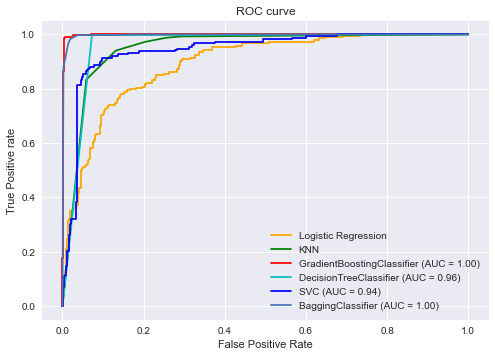

In [233]:
plt.style.use('seaborn')

disp = plot_roc_curve(log_reg,x_test,y_test,color='orange', label='Logistic Regression')
plot_roc_curve(knn,x_test,y_test,color='green', label='KNN',ax=disp.ax_)
plot_roc_curve(gbt,x_test,y_test,color='red',ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,color='c',ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,color='b',ax=disp.ax_)
plot_roc_curve(bag_clf,x_test,y_test,ax=disp.ax_)

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Saving Model 

In [235]:
import pickle

# save the model to disk

filename = 'Wine_model.pk1'
pickle.dump(gbt, open(filename, 'wb'))

In [238]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
